# 1. DEFINE

#### 1.1 Define the problem

In [1]:
# This problem aims at analyzing which group/category of people had higher chance of survial in the Titanic tragedy.
# With the given set of features/columns, the problem aims at establishing the factors that contributing in 
# deciding the fate of passengers.

# 2. DISCOVER

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

### 2.1 Obtain dataset

In [3]:
# Training dataset
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Testing dataset
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# A point to be noted here is: the number of columns in train_data and test_data datasets are different. This is because the 
# train_data dataset consists of one extra column, namely 'Survived', which will be considered as the class/label for this
# dataset as per the problem definition.

# The return type of pd.read_csv() is a DataFrame. So, 'train_data' and 'test_data' are both dataframes.

In [6]:
# The dimension of the train_data dataset can be obtained as:
train_data.shape

(891, 12)

In [7]:
# This implies there are 891 entries/rows and a total of 12 columns in the dataset

In [8]:
# The dimension of test_data dataset can be obtained as:
test_data.shape

(418, 11)

In [9]:
# This implies that there are 418 entries/rows and a total of 11 columns in the dataset

Now we have two datasets. <br>
The 'train_data' consists of 891 entries and 12 columns (including the class label column 'Survived') <br>
The 'test_data' consists of 418 entries and 11 columns

### 2.2 Cleaning dataset

In order to preserve the original datasets we will create one replicas of each of the original dataset and make changes in those replicas instead of the original dataset.

In [10]:
# Copying original train_data and test_data in a new dataframe
train = train_data.copy()
test = test_data.copy()

### 2.2.1 First let's explore the columns in the datasets which do not contribute in our analysis and can be __dropped__.

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# The columns 'PassengerId' and 'Ticket' does not hold relevance in deciding the survival of a passenger and hence can be dropped.
to_drop = ['PassengerId','Ticket']
train.drop(to_drop,axis = 1, inplace = True) 
# 'axis = 1' implies columns; 'inplace = True' implies that the change be made directly in the object 
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [13]:
# To maintain consistency in the datasets, the same process will be repeated for the test dataset
test.drop(to_drop, axis = 1, inplace = True)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [14]:
# Checking for the datatypes of columns to ensure if we need to make any chnages in any column's datatype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


The datatype listed for each column looks good enough and requires no change at the moment.

In [15]:
# Checking for the consistency in the column names
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [16]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

All the column names seems consistant in the train and test dataset. By consistant here it means, the first letter of each column is consistant and capital and there is no hidden space in the names of the columns.


### Checking the frequency count of each column

### Traget variable : Survived
Description: whether the passenger survived or not <br>
0: did not survive <br>
1: survived

In [17]:
# Survived
train.Survived.value_counts(dropna = False)

0    549
1    342
Name: Survived, dtype: int64

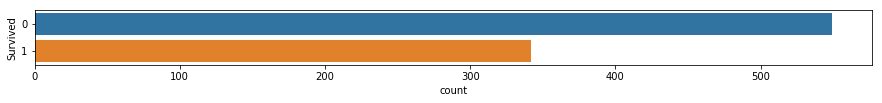

In [18]:
fig = plt.figure(figsize = (15,1))
sns.countplot(y = 'Survived', data = train)

__*So, a total of 549 passengers did not survive the Titanic tragedy.* __

### Feature : Pclass
Description: passenger class (a proxy of socio-economic status) <br>
1 : Upper class <br>
2 : Middle class <br>
3 : Lower class <br>

In [19]:
# Pclass
train.Pclass.value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

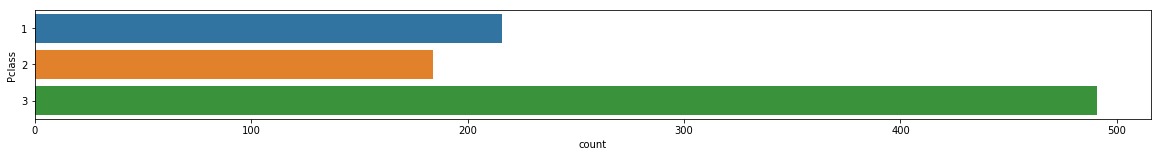

In [20]:
pclass_fig = plt.figure(figsize = (20,2))
sns.countplot(y = 'Pclass', data = train)

__*The maximum number of passengers on board were in class 3 followed by 1 and 2 respectively.*__

### Feature : Name
Description : Name of the passenger

In [21]:
train.Name.value_counts(dropna = False).head()

Saundercock, Mr. William Henry                  1
Fortune, Mr. Mark                               1
Sutton, Mr. Frederick                           1
Barah, Mr. Hanna Assi                           1
Shelley, Mrs. William (Imanita Parrish Hall)    1
Name: Name, dtype: int64

A total of 891 unique entries are there in 'Name'. <br>
This means every passenger had a different name. These name would not be useful in identifying the survival rate of the passenger. <br>
But instead, we can use the salutations/title in the names to see of there is any relation with a pssenger's title and their chance of survival.

In [22]:
titles = train['Name'].str.extract('([A-Za-z]+)\.', expand = False)
df = pd.DataFrame(titles)
train.update(df)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,NaN,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C85,C
2,1,3,Miss,female,26.0,0,0,7.9250,NaN,S
3,1,1,Mrs,female,35.0,1,0,53.1000,C123,S
4,0,3,Mr,male,35.0,0,0,8.0500,NaN,S


In [23]:
train['Name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Lady          1
Countess      1
Ms            1
Sir           1
Capt          1
Jonkheer      1
Name: Name, dtype: int64

There are 17 different types of titles used. <br>
The major one's being 'Mr', 'Miss', 'Mrs' and 'Master'.  <br>

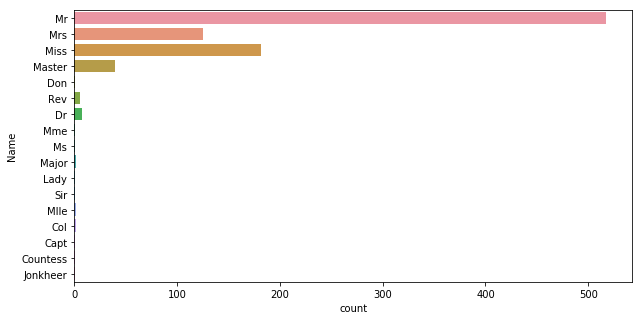

In [24]:
name_fig = plt.figure(figsize = (10,5))
sns.countplot(y = 'Name', data = train)

### Feature : Sex
Description : Sex of the passenger <br>
male : Male <br>
female : Female

In [25]:
# Sex
train.Sex.value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

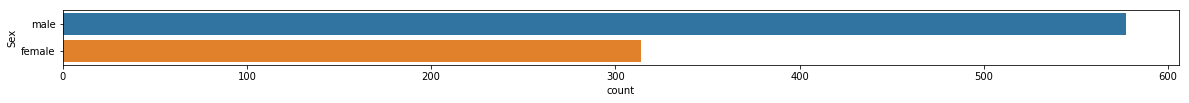

In [26]:
sex_fig = plt.figure(figsize = (20,1))
sns.countplot(y = 'Sex', data = train)

__*The number of male passengers are significantly more than female passengers*__

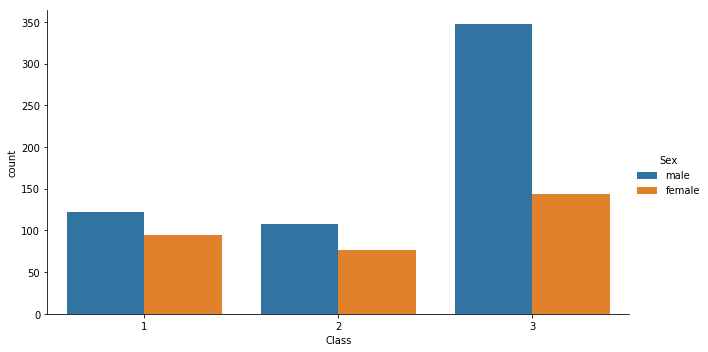

In [27]:
# Number of males and females in each class.
fig1 = sns.catplot('Pclass', data = train, hue = 'Sex',kind = 'count', aspect = 1.75)
fig1.set_xlabels('Class')

The number of male passengers were highest in the third class followed by class 1 and 2. <br>
As seen from the previous graph, the number of females on board were quite less than males and the majority of females belonged to the third class.

In [28]:
# A brief overview of the survivors and non survivors based on their class and sex.
table = pd.crosstab(index = [train.Pclass,train.Survived], columns = [train.Sex])


In [29]:
table.unstack()

Sex      female     male    
Survived      0   1    0   1
Pclass                      
1             3  91   77  45
2             6  70   91  17
3            72  72  300  47

The maximum number of people who died were in class 3. This also accompanies the fact that as the number of passengers travelling in the third class was quite high, the chances of having more non survivors can be accounted in that class, when compared to the rest of the classes.

### Feature : Age
Decription : Age of the passenger <br>

In [30]:
# Age
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The average age pf people on board were about 29-30 years old (mean). <br>
The oldest person onboard was of age 80 and the youngest was a 4 months old baby.

### Feature: SibSp
Description : Number of siblings or spouse on board

In [31]:
# SibSp
train.SibSp.value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

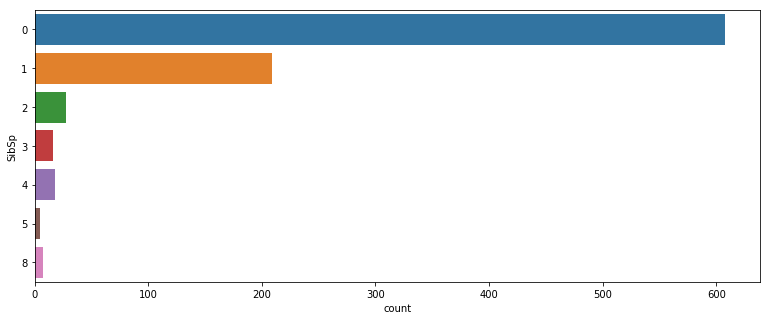

In [32]:
sibsp_fig = plt.figure(figsize = (13,5))
sns.countplot(y = 'SibSp', data = train)

The number of passengers who were travelling alone is quite high, i.e., there were about 608 passengers on board who did not
travel with either a spouse or a sibling with them.
One interesting thin to note here is, the count 5 for 5 SibSp implies that these 5 people might be related ot each other. Lets explore them to dig a little more deep.

In [33]:
train.loc[train['SibSp']== 5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
59,0,3,Master,male,11.0,5,2,46.9,NaN,S
71,0,3,Miss,female,16.0,5,2,46.9,NaN,S
386,0,3,Master,male,1.0,5,2,46.9,NaN,S
480,0,3,Master,male,9.0,5,2,46.9,NaN,S
683,0,3,Mr,male,14.0,5,2,46.9,NaN,S


We can say that these 5 people are each other's siblings (kids as young as 1 year old and as old as 16 years old), with both their mother and father on board with them (Parch = 2, for all of them). They boarded the Titanic from Southampton (Emabrked = S). The eldest one was a sister and other four were the brothers (Sex = female, male). Unfortunately, none of the 5 siblings survived the disaster.

One more important point to note here is that we could deduce this information only because there were only 5 people on board with 5 siblings. If we try to check for other values of SibSp, we might not get the same insights.

In [34]:
train.loc[train['SibSp']== 8]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
159,0,3,Master,male,NaN,8,2,69.55,NaN,S
180,0,3,Miss,female,NaN,8,2,69.55,NaN,S
201,0,3,Mr,male,NaN,8,2,69.55,NaN,S
324,0,3,Mr,male,NaN,8,2,69.55,NaN,S
792,0,3,Miss,female,NaN,8,2,69.55,NaN,S
846,0,3,Mr,male,NaN,8,2,69.55,NaN,S
863,0,3,Miss,female,NaN,8,2,69.55,NaN,S


Here we can not say anything about the relation between the 8 passengers

In [35]:
# Let's check these 8 passengers with their names as well
train_data.loc[train_data['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


The only conclusion we can draw from the names is that all these 8 passengers might be related to each other as they have the same second name.

### Feature: Parch
Description : Number of parents or children onboard

In [36]:
# Prach
train.Parch.value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

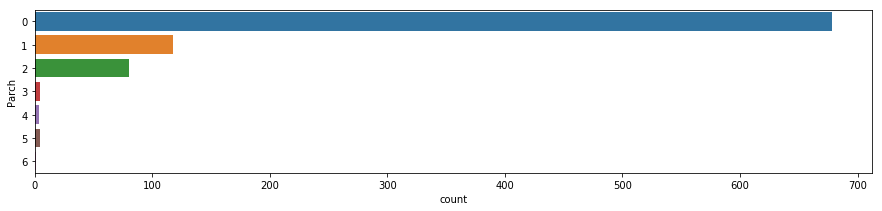

In [37]:
parch_fig = plt.figure(figsize = (15,3))
sns.countplot(y = 'Parch', data = train)

There are 678 people who are neither accompanied by their parents or children on Titanic.

In [38]:
len(train[(train['SibSp'] == 0) & (train['Parch'] == 0)])

537

So there are 537 passengers on board who are indivduals with no spouse, siblings, parent or children with them on board.

### Feature: Fare
Description : Ticket cost of the passenger

In [39]:
# Fare
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

The maximum fare of Titanic was 512.32920. <br>

### Feature: Cabin
Description : Cabin number of the passenger

In [40]:
# Cabin
train.Cabin.value_counts(dropna = False)

NaN            687
G6               4
B96 B98          4
C23 C25 C27      4
F33              3
D                3
F2               3
E101             3
C22 C26          3
E67              2
D20              2
C65              2
E121             2
B20              2
D35              2
E44              2
C78              2
B51 B53 B55      2
D33              2
C123             2
B28              2
D36              2
C68              2
C125             2
C92              2
F4               2
B58 B60          2
D17              2
C52              2
B18              2
              ... 
B41              1
C32              1
B73              1
B19              1
B86              1
B4               1
C30              1
C45              1
A31              1
B42              1
C110             1
C70              1
D37              1
D6               1
C54              1
D47              1
C82              1
B79              1
C106             1
C49              1
B30              1
A6          

There are a total of 148 cabin types in Titanic. <br>
We can segregate these by deck where <br>
A - Boat Deck, <br>
B - Promenade Deck, <br>
C - Bridge Deck, <br>
D - Shelter Deck, <br>
E - Saloon Deck, <br>
F - Upper Deck, <br>
G - Middle Deck <br>

The first letter of the Cabin tells us about the deck on which the cabin is. So, making use of this information, we can split the cabin numbers from the deck and use that to identify which deck has more survival chances.
This is done because the frequency of each of 148 cabin types is either 1,2,3 or 4 which does not contribute in our analysis.

__*Assumptions used:*__ <br>
__1. Cabin entries like 'C23 C25 C27' will be replaced by 'C' assuming that the passenger belonged to deck C__ <br>
__2. Cabin entries like 'F G63' will be replaced by 'F' assuming the passenger belonged to deck F (This is based on the information provided online about Titanic that level G was used for storage and there were no cabins on that level of Titanic)__


In [41]:
cabins = train['Cabin'].str[0]
df = pd.DataFrame(cabins)
train.update(df)

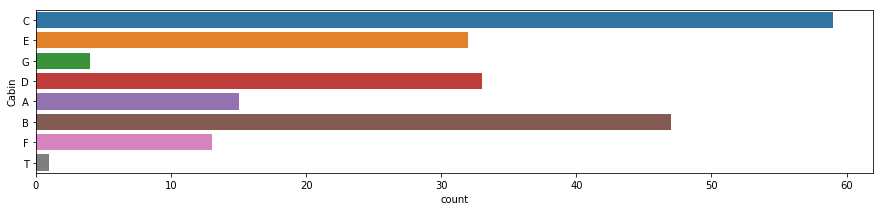

In [42]:
cabin_fig = plt.figure(figsize = (15,3))
sns.countplot(y = 'Cabin', data = train)

In [43]:
# Replicating the same in the test dataset to maintain consistency
cabin = test['Cabin'].str[0]
df_test = pd.DataFrame(cabin)
test.update(df_test)

### Feature: Embarked
Description : Port of embarkation of each passenger <br>
C : Cherbourg <br>
Q : Queenstown <br>
S : Southampton <br>
The first point of start for Titanic was Southampton followed  by Queenstown and then Cherbourg

In [44]:
# Embarked
train.Embarked.value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

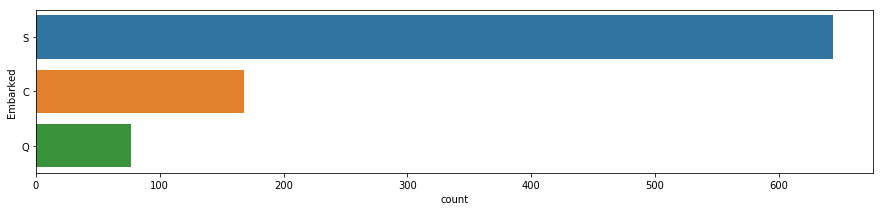

In [45]:
embarked_fig = plt.figure(figsize = (15,3))
sns.countplot(y = 'Embarked', data = train)

This shows  that maximum number of people boarded Titanic from Southampton, which was the starting point of the sail.<br>
We have 2 NaN values. 

### Handling missing data

In [46]:
# First we check for missing values in the dataset
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

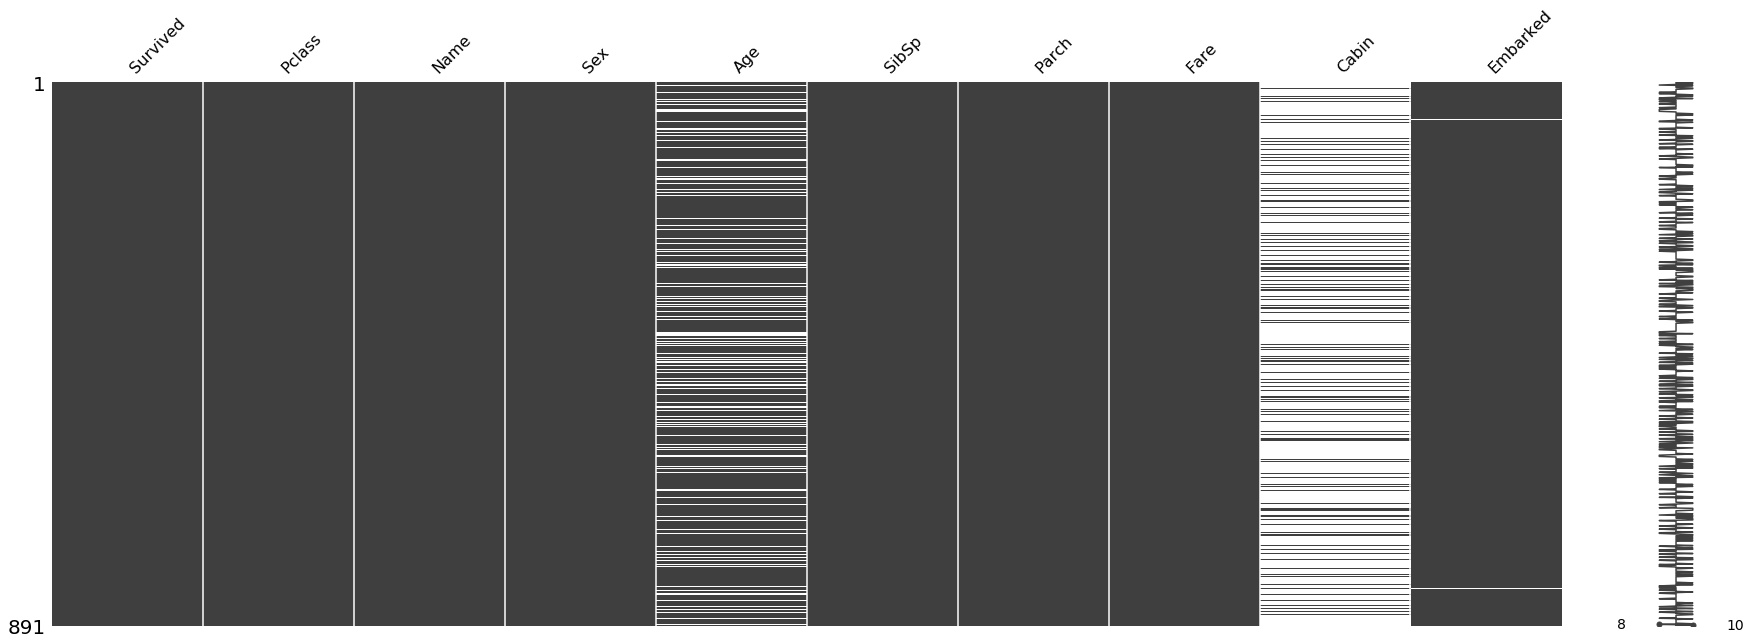

In [47]:
# Visually analysing the columns with missing values
missingno.matrix(train, figsize = (30,10))

Out of 12 columns, 3 columns consists of missing data <br>
Age : 177 missing values <br>
Cabin : 687 missing values <br>
Embarked : 2 missing values <br>
Column 'Cabin' consists of maximum number of null values

#### Missing values in 'Age'

'Age' contains about 20% of missing values. <br>
This can be handled by inserting appropriate age values using the salutations in the Name of the passenger.

In [48]:
means = train.groupby('Name')['Age'].mean()
means

Name
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [49]:
# Saving these mean ages in a dictionary
mean_ages = means.to_dict()
mean_ages

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.773972602739725,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [50]:
# Imputing ages based on title in the name
age_index = train.loc[np.isnan(train['Age'])].index
train.loc[age_index,'Age'] = train['Name'].loc[age_index].map(mean_ages)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,Mr,male,22.000000,1,0,7.2500,NaN,S
1,1,1,Mrs,female,38.000000,1,0,71.2833,C,C
2,1,3,Miss,female,26.000000,0,0,7.9250,NaN,S
3,1,1,Mrs,female,35.000000,1,0,53.1000,C,S
4,0,3,Mr,male,35.000000,0,0,8.0500,NaN,S
5,0,3,Mr,male,32.368090,0,0,8.4583,NaN,Q
6,0,1,Mr,male,54.000000,0,0,51.8625,E,S
7,0,3,Master,male,2.000000,3,1,21.0750,NaN,S
8,1,3,Mrs,female,27.000000,0,2,11.1333,NaN,S
9,1,2,Mrs,female,14.000000,1,0,30.0708,NaN,C


All the NaN values in 'Age' are now replaced with the dictioanry mapping of the title in passenger's name.

In [51]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

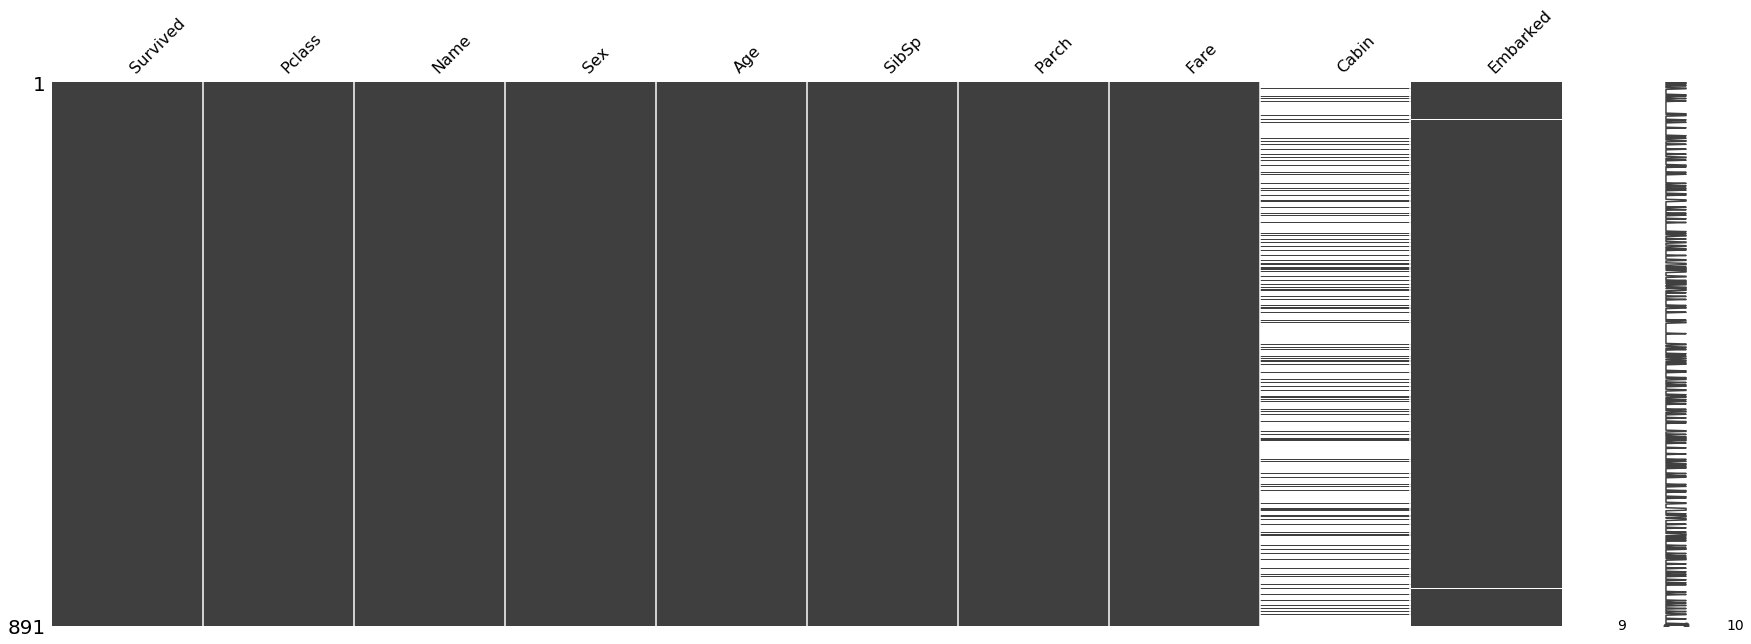

In [52]:
missingno.matrix(train, figsize = (30,10))

*Now there are no missing values in 'Age'*

#### Missing values in 'Cabin'

__*To fill Cabin column, following apporach can be used :* __

Alphabet in 'Cabin' column basically describes the deck on which the passenger wqas living. <br>
We know that each deck was associated with a class.<br>
And every class had a different Fare for the ticket. <br>
So, on grouping by 'Pclass' we can get a range of 'Fare' and the possible values of 'Cabin' <br>
Using this we can allocate the missing 'Cabin' values in the dataset.

In [53]:
# Creating a dataframe 'allocations' with only details of 'Pclass', 'Fare' and 'Cabin'
allocations = train[['Pclass','Fare','Cabin']].copy()

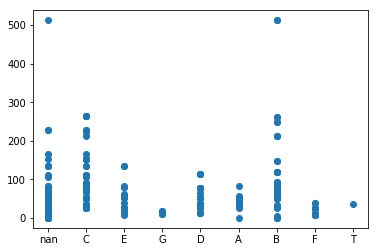

In [54]:
plt.scatter(allocations["Cabin"].astype(str), allocations["Fare"])
plt.show()

There is no specific relation between 'Fare' and 'Cabin' columns. <br>
So, we cannot use them to attain the missing Cabin values

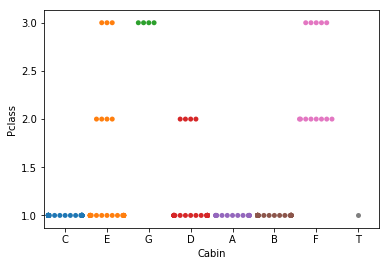

In [55]:
sns.swarmplot(x="Cabin", y="Pclass", data=allocations)

In [56]:
# Extracting values in allocations where 'Pclass' is 1. That is, the passenger is travelling in the first class.
#class_1 = allocations[allocations['Cabin'].notnull() & (allocations['Pclass'] == 1)]

In [57]:
cabin_c = allocations[(allocations['Cabin'] == 'C') & (allocations['Pclass'] == 1)]
cabin_c

,Pclass,Fare,Cabin
1,1,71.2833,C
3,1,53.1000,C
11,1,26.5500,C
27,1,263.0000,C
55,1,35.5000,C
62,1,83.4750,C
88,1,263.0000,C
110,1,52.0000,C
137,1,53.1000,C
151,1,66.6000,C


Eventhough we can say that every passenger travelling in Cabin C belonged to Passenger Class 1, but this might not be tru vice-versa.<br>
Hence, we cannot establish a specific relation between Pclass and Cabin too.

__As Cabin consists of 687 missing values, i.e. approximately 77%, we can go ahead and altogehter drop this column.__

In [58]:
train.drop(['Cabin'], axis = 1, inplace = True)

In [59]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

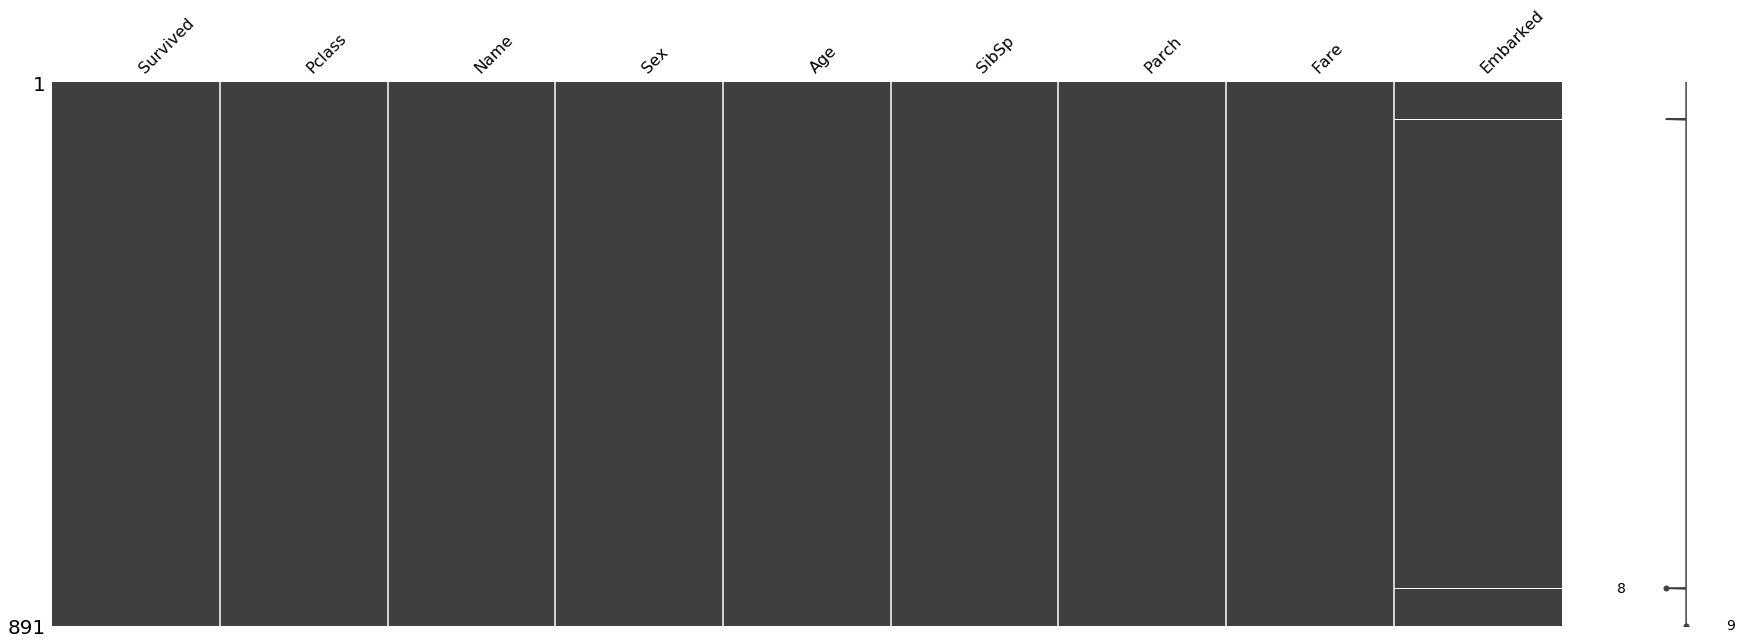

In [60]:
missingno.matrix(train, figsize = (30,10))

Now. we no longer have Cabin column in our dataset.

#### Missing values in 'Embarked'

__Since there are only 2 missing values out of 891 values in the 'Embarked' column, we can simply ignore these values by dropping these two rows__

In [61]:
train.dropna(subset = ['Embarked'], axis = 0, inplace = True)

In [62]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

So now we have as we have removed the two rows which contained Null values for 'Embarked' column, the isnull statistics shows that there are no more null values in 'Embarked'.

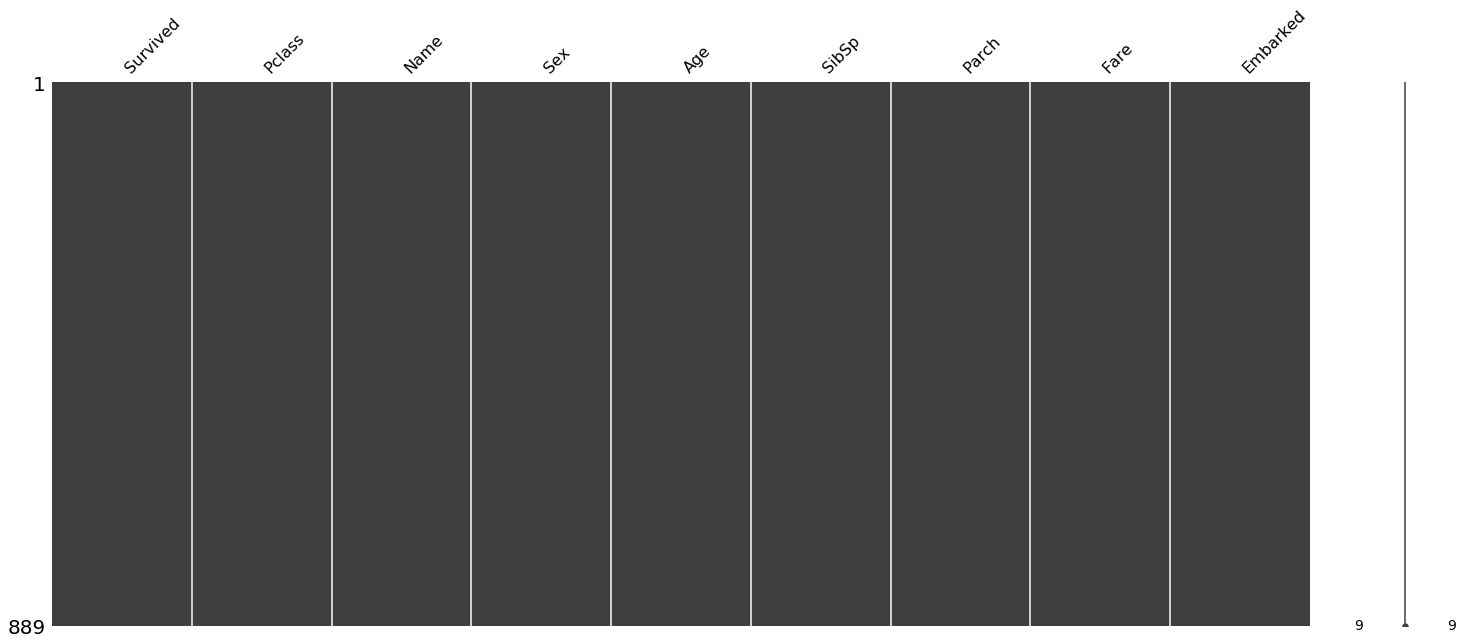

In [63]:
missingno.matrix(train, figsize = (25,10))

__*So, now we have a clean dataset, without any missing values with a total of 889 observations and 9 columns*__

## EDA : Exploring relation between Target and Feature variables

In [64]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


### Feature: Pclass

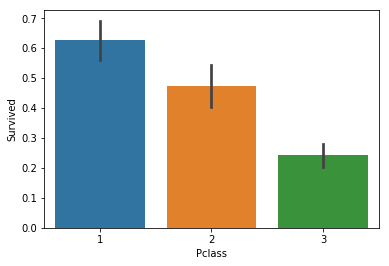

In [65]:
sns.barplot(train.Pclass, train.Survived)

This leads us to the relation between a passenger's class and their survival chances. <br>
It is more likely for a passenger to survive if he/she belongs to the first class rather than any other class. <br>
__*Hypothesis 1: The class of a passenger affects their survival chance.*__

### Feature: Name

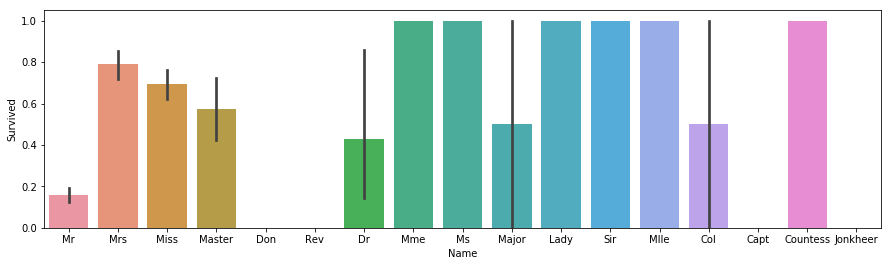

In [66]:
fig_name = plt.figure(figsize = (15,4))
sns.barplot(train.Name, train.Survived)

This graph is a little misleading. Let's first understand the spread of vlaues in each title

In [67]:
train.Name.value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Lady          1
Countess      1
Ms            1
Sir           1
Capt          1
Jonkheer      1
Name: Name, dtype: int64

Since 'Mr', 'Miss', 'Mrs' and 'Master' have the maximum information, let's club the rest of the titles as 'Other' for simplicity.

In [68]:
list_of_titles = ['Dr','Rev','Major','Col','Mlle','Countess','Jonkheer','Capt','Lady','Mme','Ms','Don','Sir']
train.Name.replace(list_of_titles,'Other',inplace = True)

In [69]:
train.Name.value_counts()

Mr        517
Miss      181
Mrs       124
Master     40
Other      27
Name: Name, dtype: int64

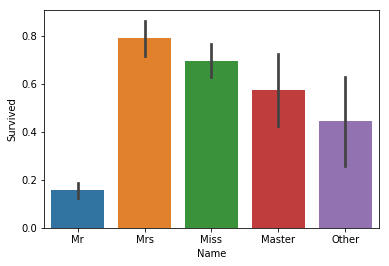

In [70]:
sns.barplot(train.Name, train.Survived)

This graph shows that the chance of survival of passenger with title 'Mrs','Miss' and Master is quite high. <br>
As for the the title 'Other' the error around the mean is quite variable (the black bar), implying the people grouped under the Other category do not specifically define a relation with the target variable. <br>
__*Hypothesis 2: The class of a passenger does affect the survival chances. People with title 'Mr' have least chances of survival. *__

### Feature: Sex

The above graph used the title of the passenger to determine their survival chances. But in the Other category there is a mix of female and male. <br>
Let's break it down further to be more precise with our hypothesis.

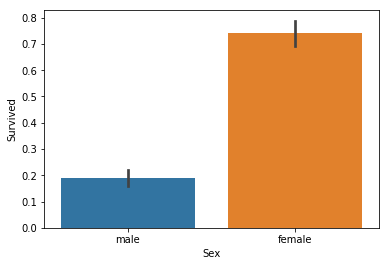

In [71]:
sns.barplot(train.Sex, train.Survived)

This graph very clearly draws attention to the fact that the survival chances of females are much higher than that of males. <br>
This evem explains the high survival chances of passengers with title 'Mrs' and 'Miss'. <br>
This can even imply that women and children were evacuated first from Titanic, thus saving their lives. <br>
__*Hypothesis 3: Female passengers have more chances of surviving than male passengers. *__

### Feature: Age

Let's drill down this analysis a little further into age group of the passengers.

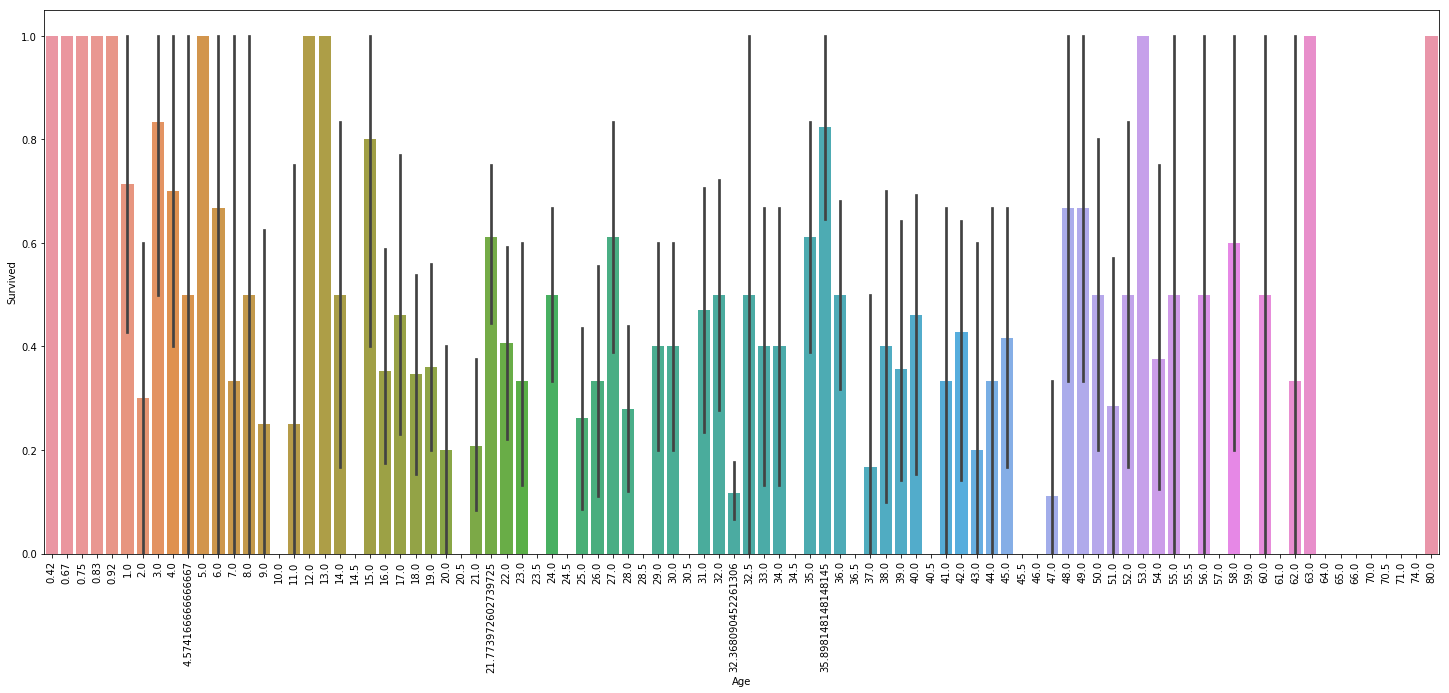

In [72]:
fig_age = plt.figure(figsize = (25,10))
sns.barplot(train.Age, train.Survived)
plt.xticks(rotation=90);

Since we have a wide range of ages of passengers, let's club them together into the generally known categories of - <br>
Children (0 - 12) <br>
Teenagers (13 - 19) <br>
Adults (20 - 39) <br>
Middle aged (40 - 59) <br>
Elderly (60 - 80) <br>
__*Note: These categories are formed based in general assumptions and can be changed. *__

In [73]:
age_labels = pd.DataFrame()
age_labels['Age'] = pd.cut(train.Age, bins = [0,12,19,39,59,81], labels = ['Child','Teen','Adult','Middle Aged','Elderly'], include_lowest = True, right = False)
age_labels.Age
train['Age_Labels'] = age_labels['Age']
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
Survived      889 non-null int64
Pclass        889 non-null int64
Name          889 non-null object
Sex           889 non-null object
Age           889 non-null float64
SibSp         889 non-null int64
Parch         889 non-null int64
Fare          889 non-null float64
Embarked      889 non-null object
Age_Labels    889 non-null category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 110.5+ KB


In [74]:
# Now we can drop the Age column as we have th subsequent Age_labels for it
train.drop(['Age'], axis = 1, inplace = True)

In [75]:
train.head(15)

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Age_Labels
0,0,3,Mr,male,1,0,7.2500,S,Adult
1,1,1,Mrs,female,1,0,71.2833,C,Adult
2,1,3,Miss,female,0,0,7.9250,S,Adult
3,1,1,Mrs,female,1,0,53.1000,S,Adult
4,0,3,Mr,male,0,0,8.0500,S,Adult
5,0,3,Mr,male,0,0,8.4583,Q,Adult
6,0,1,Mr,male,0,0,51.8625,S,Middle Aged
7,0,3,Master,male,3,1,21.0750,S,Child
8,1,3,Mrs,female,0,2,11.1333,S,Adult
9,1,2,Mrs,female,1,0,30.0708,C,Teen


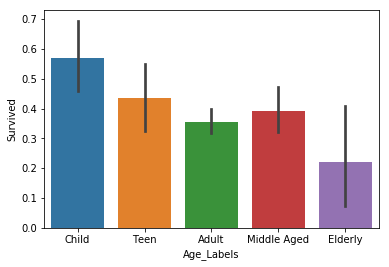

In [77]:
# Let's see which category of people survived 
sns.barplot(train.Age_Labels, train.Survived)

The graph shows that children have more than 50% chnaces of survival. <br>
Elderly on the other hand have the lowest survival rate, which can be due to the fact that they did not receive help in reaching the life boats or could not survive the panic at the time of the disaster. <br>
__*Hypothesis 4: Survival chances of children is the highest. *__

### Feature: SibSp

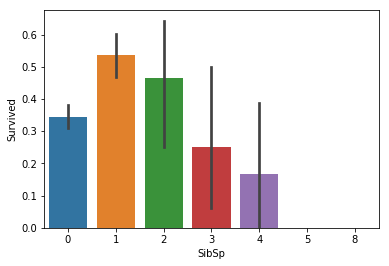

In [78]:
sns.barplot(train.SibSp, train.Survived)

People with 1 or 2 siblings or spouse had higher chance of survival. <br>
Passengers with no sibliing or spouse with them did have higher survival rate than those with 3 or 4. <br>
It's difficult to draw any conclusion about the survival rates here as of now.

### Feature: Parch

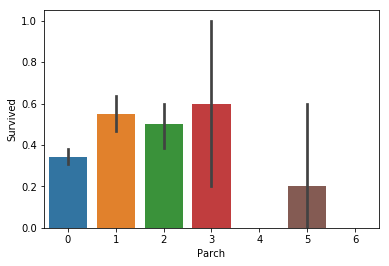

In [79]:
sns.barplot(train.Parch, train.Survived)

In this graph too, the trend is not very clear about survival rate of passengers based on the number of parents or children traveling with them.

### Feature: Fare

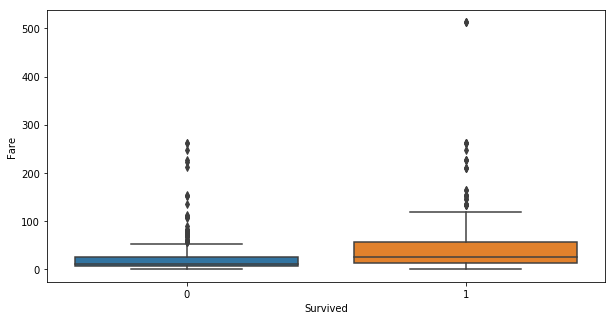

In [87]:
# Barplot does not seems to be a good choice for a continuous variable like 'Fare'. So we will use boxplot instead.
fare_plot = plt.figure(figsize = (10,5))
sns.boxplot(train.Survived, train.Fare)

This graph shows that passengers who survived had paid higher amount for travelling in Titanic. <br>
__*Hypothesis 5: Higher the fare, higher the survival rate. *__

### Feature: Embarked

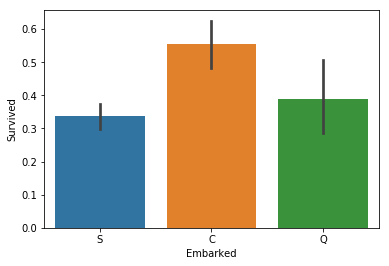

In [88]:
sns.barplot(train.Embarked, train.Survived)

Eventhough this graph shows that passengers who boarded Titanic from Cherbourg (C) had a higher chance of surviving, but this cannot lead to any hypothesis. This is because boarding the ship from any location would not alter the survival rates. <br>
But there can be other reasons for this unusual behaviour.

# 3. Develop

This is a binary problem with unbalanced observation in both classes

## 3.1 Feature Engineering

### One - Hot encoding
Encoding is required in a dataset which contains categorical values with string data type. This is because some machine learning algorithms do not work well with string values and require numeric values to do computations. <br>
So, here we can use one hot encoder to convert all categorical values to numeric values.

## 3.2 Machine learning model

# REFERENCES:
https://realpython.com/python-data-cleaning-numpy-pandas/  <br>
http://www.titanicandco.com/inside.html  <br>
https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/ <br>
https://www.ntu.edu.sg/home/ehchua/programming/howto/Regexe.html
